In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:


train = pd.read_csv(r"C:\Users\aisha\Downloads\drugs_train.csv")
test = pd.read_csv(r"C:\Users\aisha\Downloads\drugs_test.csv")


print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (161297, 7)
Shape of test : (53766, 7)


In [8]:


data = pd.concat([train, test])


data.shape

(215063, 7)

In [9]:


data.sample(5)


,,drugName,condition,review,rating,date,usefulCount
133420,12758,Etanercept,Psoriatic Arthritis,"""Excellent , no need to say more. Life changin...",10.0,"December 14, 2012",50
91098,39160,Contrave,Obesity,"""On my second week of Contrave, and I have exp...",5.0,"May 4, 2017",8
101706,118821,Zoloft,2</span> users found this comment helpful.,"""I had taken Zoloft for a year now and it did ...",9.0,"January 4, 2012",2
16789,220957,Diclofenac / misoprostol,Rheumatoid Arthritis,"""I have been taking this for 12 yrs , made a b...",10.0,"December 12, 2012",50
51508,143503,Etonogestrel,Birth Control,"""Personally I liked the nexplanon when I first...",10.0,"January 6, 2017",6


In [10]:


data.describe()

,,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [11]:


data.isnull().any()

               False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

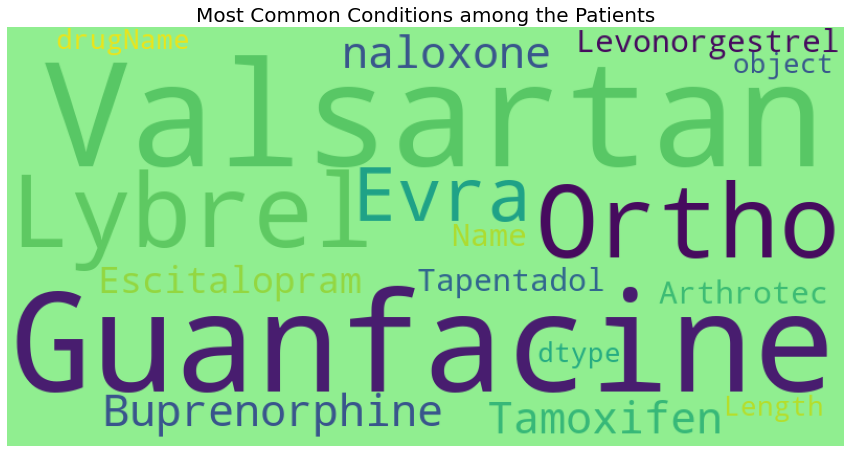

In [12]:
# most common condition

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, max_words = 100, width = 800, height = 400).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

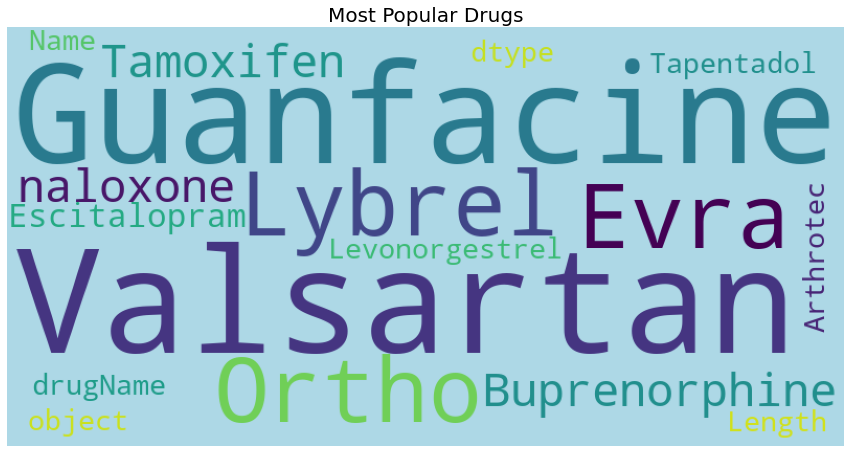

In [13]:
# world cloud of most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 800, height = 400).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

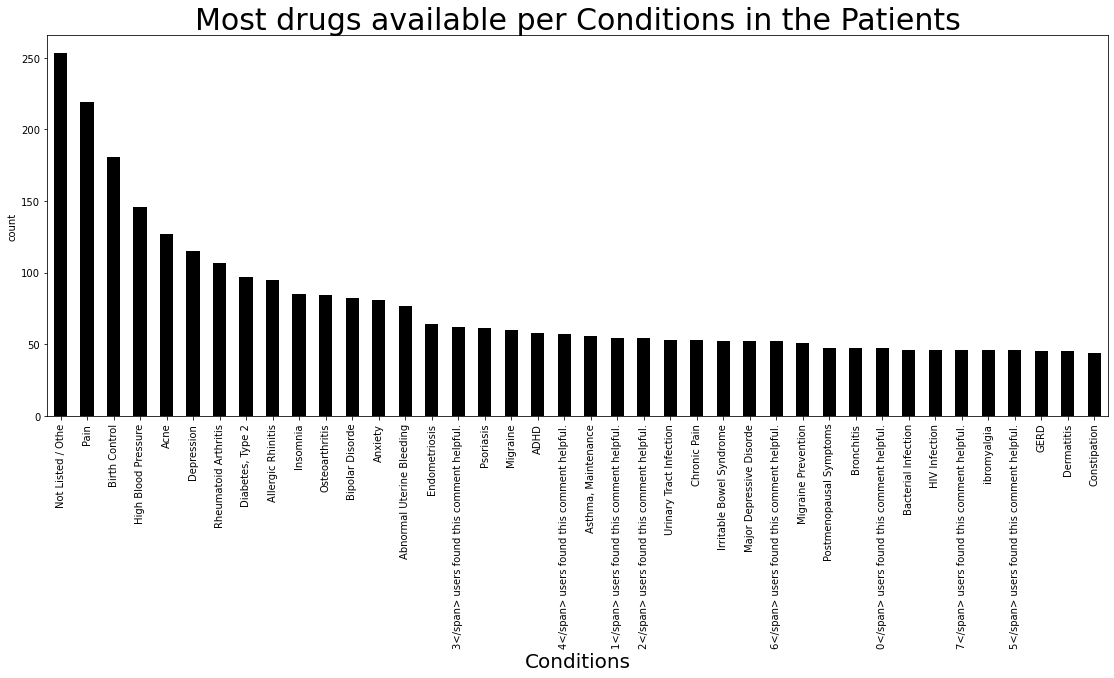

In [14]:
#  most popular drugs per conditions

data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'black')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

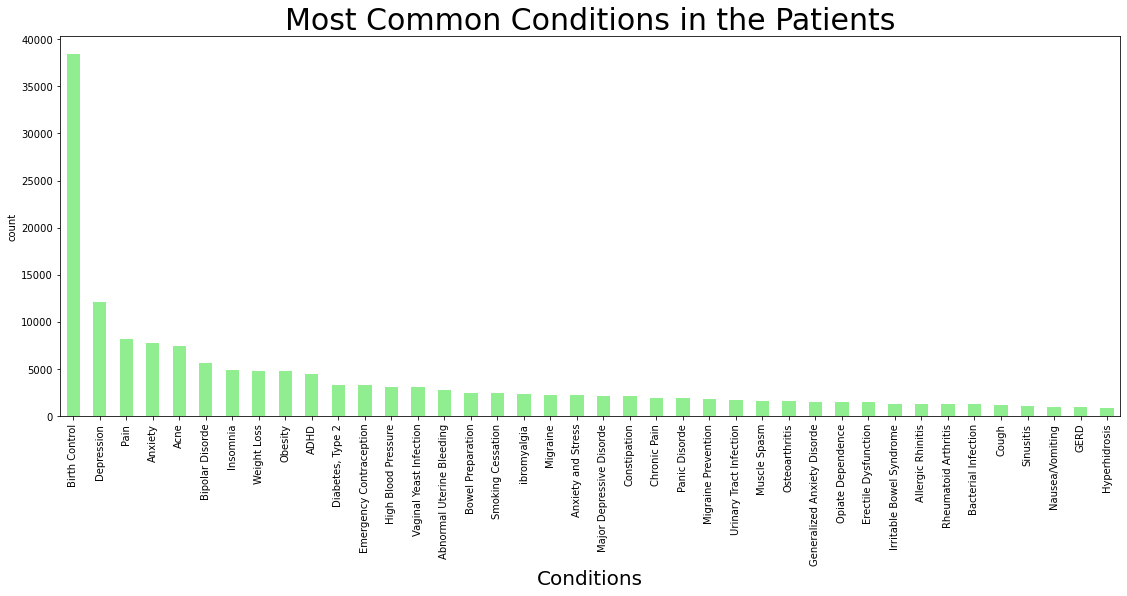

In [15]:

#  different types of conditions patients have


data['condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'lightgreen')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

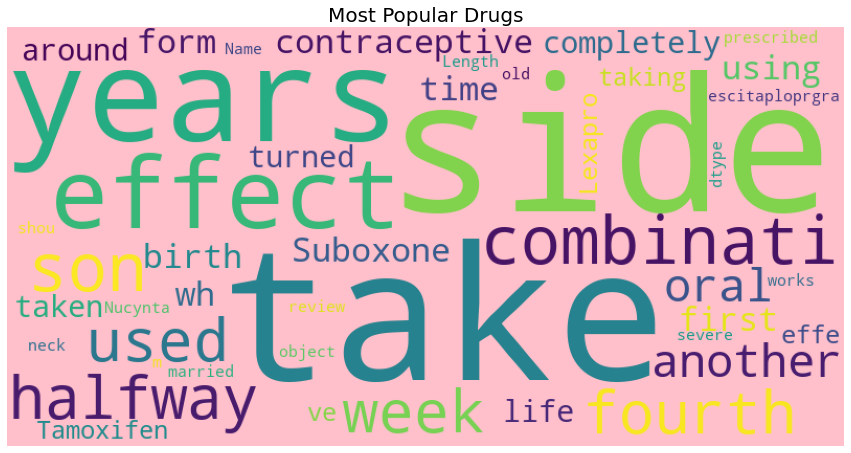

In [16]:
# let's see the words cloud for the reviews 

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 800, height = 400).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
# feature engineering 
# Making a new column:review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

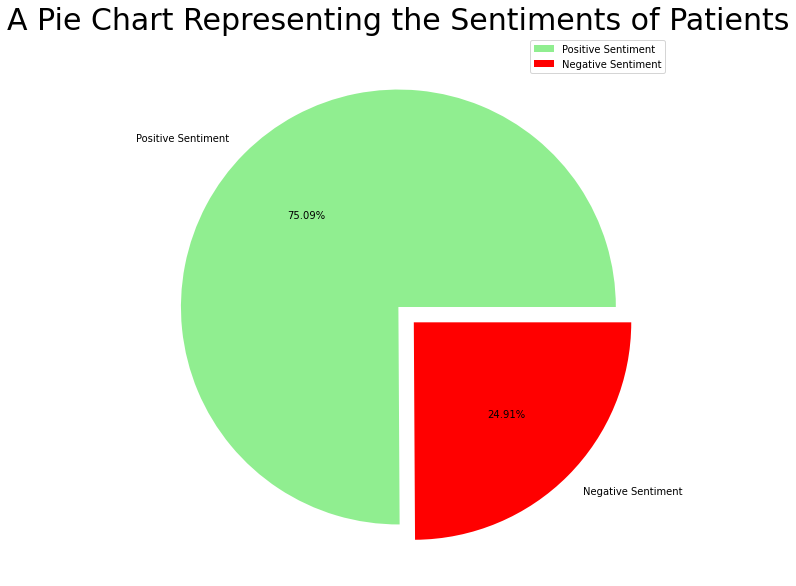

In [18]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightgreen', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [19]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

C:\Users\aisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


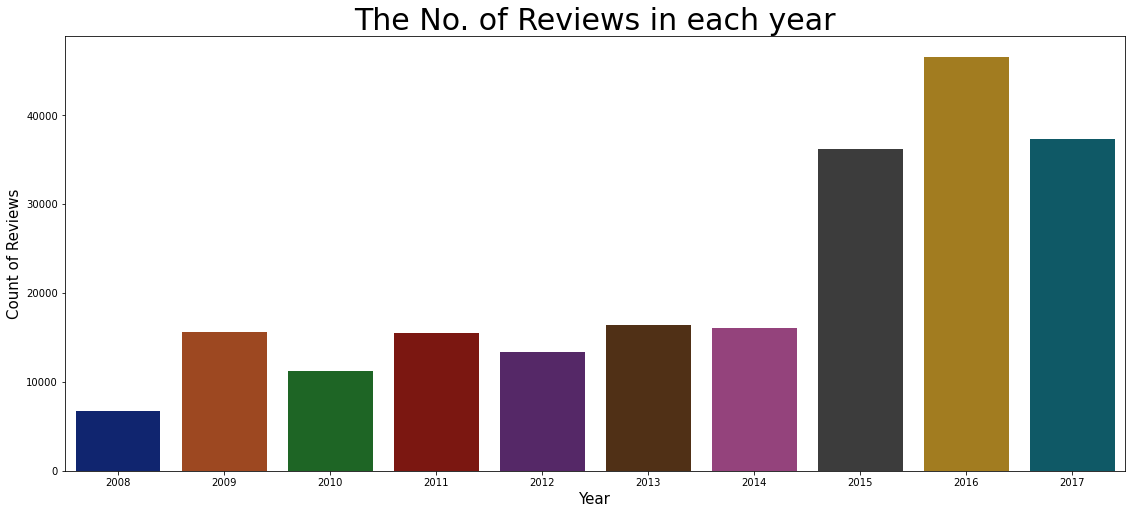

In [20]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

C:\Users\aisha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


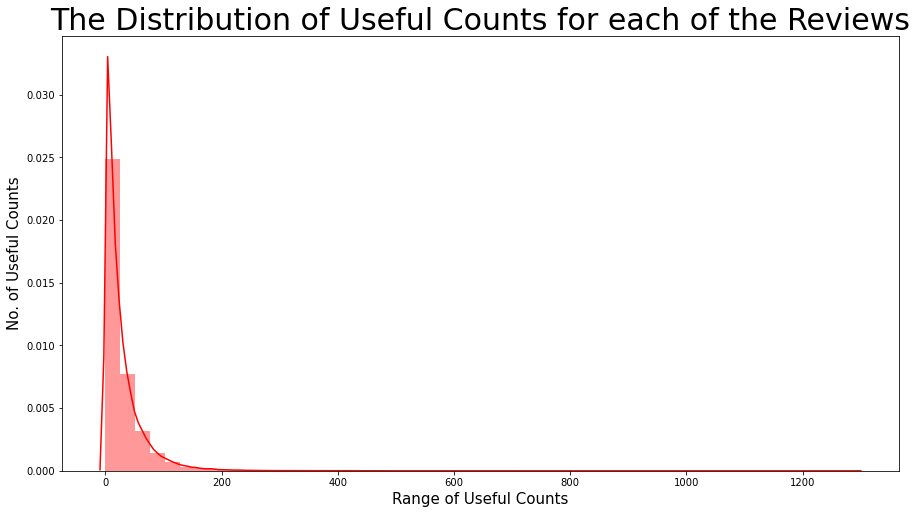

In [21]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'red')
plt.title('The Distribution of Useful Counts for each of the Reviews', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

In [22]:
data['condition'].isnull().sum()

1194

In [23]:
# we will delete the rows so that the data does not overfits 

data = data.dropna(axis = 0)

# checking the new shape of the data
data.shape

(213869, 11)

In [27]:
# importing the important libraries 

import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:

# removing some stopwords 

stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [29]:
data['review'].head(10)

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
5    "2nd day on 5mg started to work with rock hard...
6    "He pulled out, but he cummed a bit in me. I t...
7    "Abilify changed my life. There is hope. I was...
8    " I Ve had  nothing but problems with the Kepp...
9    "I had been on the pill for many years. When m...
Name: review, dtype: object

In [30]:
data.columns

Index([' ', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'Review_Sentiment', 'Year', 'month', 'day'],
      dtype='object')

In [31]:
df_condition = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

,condition,drugName
896,Autoimmune Hemolytic Anemia,1
897,Microscopic polyangiitis,1
898,Salmonella Gastroenteritis,1
899,"Meningitis, Meningococcal",1
900,72</span> users found this comment helpful.,1
901,70</span> users found this comment helpful.,1
902,Scleroderma,1
903,Manscaping Pain,1
904,64</span> users found this comment helpful.,1
905,Secondary Cutaneous Bacterial Infections,1


In [32]:
# setting a df with conditions with only one drug
df_condition_1 = df_condition[df_condition['drugName'] == 1].reset_index()

all_list = set(data.index)

# deleting them
condition_list = []
for i,j in enumerate(data['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
data = data.iloc[list(new_idx)].reset_index()
del data['index']

In [33]:

# removing the conditions with <span> in it.

all_list = set(data.index)
span_list = []
for i,j in enumerate(data['condition']):
    if '</span>' in j:
        span_list.append(i)
new_idx = all_list.difference(set(span_list))
data = data.iloc[list(new_idx)].reset_index()
del data['index']

In [34]:
data.shape

(159332, 11)

In [35]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [36]:
%time data['review_clean'] = data['review'].apply(review_to_words)

Wall time: 3min 39s


In [37]:
data.columns

Index([' ', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'Review_Sentiment', 'Year', 'month', 'day', 'review_clean'],
      dtype='object')

In [38]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size = 0.25, random_state = 0)

# checking the shape 
print("Shape of train:", df_train.shape)
print("Shape of test: ", df_test.shape)

Shape of train: (119499, 12)
Shape of test:  (39833, 12)


In [39]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

cv = CountVectorizer(max_features = 20000, ngram_range = (4, 4))
pipeline = Pipeline([('vect',cv)])

df_train_features = pipeline.fit_transform(df_train['review_clean'])
df_test_features = pipeline.fit_transform(df_test['review_clean'])

print("df_train_features :", df_train_features.shape)
print("df_test_features :", df_test_features.shape)

df_train_features : (119499, 20000)
df_test_features : (39833, 20000)


In [40]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [41]:
# making our dependent variable

y_train = df_train['Review_Sentiment']
y_test = df_test['Review_Sentiment']
solution = y_test.copy()

# Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

#  Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               4000200   
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               60300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0

In [44]:
# 4. Train model

hist = model.fit(df_train_features, y_train, epochs=10, batch_size=64)

# 5. Traing process
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Epoch 1/10


InvalidArgumentError:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\aisha\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "C:\Users\aisha\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 135, in __call__
    ret = self._func(*args)

  File "C:\Users\aisha\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\aisha\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 471, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\aisha\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 471, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\aisha\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 469, in slice_array
    return training_utils.slice_arrays(data, ind.numpy(),

  File "C:\Users\aisha\anaconda3\lib\site-packages\keras\engine\training_utils.py", line 47, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\aisha\anaconda3\lib\site-packages\keras\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\aisha\anaconda3\lib\site-packages\keras\engine\training_utils.py", line 47, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1410]

Function call stack:
train_function
